# Ampliación de Matemáticas. Curso 2021-22.
## Máster INO, ETSI Navales, UPM

In [1]:
import numpy as np
import numpy.random
import scipy as sp
import scipy.linalg as la
from scipy.interpolate import lagrange
from scipy.optimize import bisect
import sympy as sym
import matplotlib.pyplot as plt

## Control 1.

## Apartado 1

En el siguiente código, comparamos la suma de los términos de una
progresión geométrica con el resultado exacto segun la fórmula:

$$
1+r+r^2+\dots+r^N = \frac{1 - r^{N+1}}{1-r}
$$

```python
r = 5.1
for N in range(5,40):
    suma = sum(r**k for k in range(N+1))
    sumaE = (1-r**(N+1))/(1-r)
    print(N, abs(suma - sumaE))
```

Un compañero de trabajo observa alarmado que de vez en cuando se
producen errores y que la magnitud de los errores aumenta con N.

- (0,5p.) ¿Qué tipo de error está observando? Escribe tu respuesta abajo en una celda *Markdown*.

> Es un error de redondeo, al sumar números de coma flotante.

> (aclaraciones) No es un error de truncamiento, porque se trata de una identidad. Es decir, el mismo objeto matemático, pero calculado de formas distintas. Si se hiciera con precisión infinita, el resultado sería exacto. El error se debe por completo a que la representación de los números es inexacta y las operaciones no son perfectas.

In [2]:
r = 5.1
for N in range(5,40):
    suma = sum(r**k for k in range(N+1))
    sumaE = (1-r**(N+1))/(1-r)
    print(N, abs(suma - sumaE))

5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 7.62939453125e-06
16 0.0
17 0.0
18 0.0
19 0.00390625
20 0.0
21 0.0
22 0.0
23 4.0
24 16.0
25 0.0
26 0.0
27 0.0
28 0.0
29 65536.0
30 262144.0
31 0.0
32 8388608.0
33 0.0
34 268435456.0
35 1073741824.0
36 0.0
37 34359738368.0
38 0.0
39 0.0


- (0,5p.) ¿Está usando el error relativo, absoluto o algún otro? ¿Cambia mucho la perspectiva si usamos el otro tipo de error? Escribe tu respuesta abajo en una celda *Markdown*.

> Está usando error absoluto. Si mostramos el error relativo, vemos que se mantiene muy bajo, cerca del límite inferior de los `float`.

In [3]:
r = 5.1
for N in range(5,40):
    suma = sum(r**k for k in range(N+1))
    sumaE = (1-r**(N+1))/(1-r)
    print(N, abs(suma - sumaE)/sumaE)

5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 1.4933139181213111e-16
16 0.0
17 0.0
18 0.0
19 1.130161137968357e-16
20 0.0
21 0.0
22 0.0
23 1.710643933978591e-16
24 1.341681516845954e-16
25 0.0
26 0.0
27 0.0
28 0.0
29 1.5927899413370848e-16
30 1.2492470128134e-16
31 0.0
32 1.5369436528269439e-16
33 0.0
34 1.8908956897524874e-16
35 1.4830554429431274e-16
36 0.0
37 1.8245972385305685e-16
38 0.0
39 0.0


> (extra) De hecho, usando la función `np.spacing` que vimos en el cuaderno de errores, vemos que el error, cuando lo hay, es el mínimo posible para float:

In [4]:
r = 5.1
for N in range(5,40):
    suma = sum(r**k for k in range(N+1))
    sumaE = (1-r**(N+1))/(1-r)
    print(N, suma, np.spacing(sumaE))
    print(':',abs(suma - sumaE))
    print(':',abs(suma - sumaE)/np.spacing(sumaE))

5 4291.533609999999 9.094947017729282e-13
: 0.0
: 0.0
6 21887.82141099999 3.637978807091713e-12
: 0.0
: 0.0
7 111628.88919609995 1.4551915228366852e-11
: 0.0
: 0.0
8 569308.3349001097 1.1641532182693481e-10
: 0.0
: 0.0
9 2903473.507990559 4.656612873077393e-10
: 0.0
: 0.0
10 14807715.890751852 1.862645149230957e-09
: 0.0
: 0.0
11 75519352.04283443 1.4901161193847656e-08
: 0.0
: 0.0
12 385148696.4184556 5.960464477539063e-08
: 0.0
: 0.0
13 1964258352.7341235 2.384185791015625e-07
: 0.0
: 0.0
14 10017717599.944029 1.9073486328125e-06
: 0.0
: 0.0
15 51090359760.71455 7.62939453125e-06
: 7.62939453125e-06
: 1.0
16 260560834780.64413 3.0517578125e-05
: 0.0
: 0.0
17 1328860257382.285 0.000244140625
: 0.0
: 0.0
18 6777187312650.653 0.0009765625
: 0.0
: 0.0
19 34563655294519.33 0.00390625
: 0.00390625
: 1.0
20 176274642002049.56 0.03125
: 0.0
: 0.0
21 899000674210453.8 0.125
: 0.0
: 0.0
22 4584903438473315.0 1.0
: 0.0
: 0.0
23 2.3383007536213904e+16 4.0
: 4.0
: 1.0
24 1.1925333843469091e+17 16

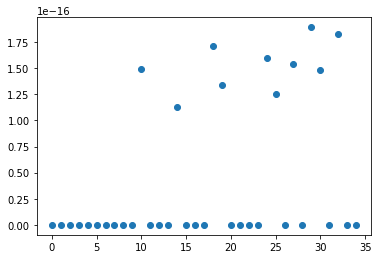

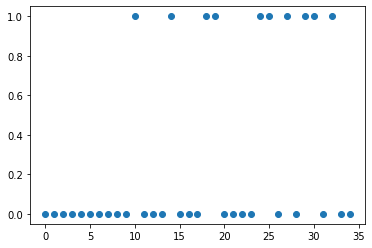

In [5]:
# Graficamente
r = 5.1
errores_rel = []
errores_spacings = []
for N in range(5,40):
    suma = sum(r**k for k in range(N+1))
    sumaE = (1-r**(N+1))/(1-r)
    errores_rel.append(abs(suma - sumaE)/sumaE)
    errores_spacings.append(abs(suma - sumaE)/np.spacing(sumaE))

plt.figure()
plt.plot(errores_rel,'o')
plt.figure()
plt.plot(errores_spacings, 'o')

## Apartado 2

Consideramos la función

$$ f(x)= 0.1 xx^{4} - 0.18 xx^{3} - 1.62 xx^{2} + 3.38 xx - 1.68. $$

En este apartado estudiaremos las raíces de la ecuación:

$$f(x)=0.$$

- (0,5p.) Produce una figura en la que se representen la gráfica de $f$ junto con el eje $Ox$ en el intervalo $[-5,5]$.

In [6]:
def f(x):
    return 0.1*x**4 - 0.18*x**3 - 1.62*x**2 + 3.38*x - 1.68

xs = np.linspace(-5,5,100)
ys = f(xs)
plt.figure(figsize=(12,6))
plt.plot(xs, ys)
plt.axhline(color='k')

- (0,5p.) Utilizando la gráfica anterior junto con tus conocimientos de Cálculo elemental indica cuántas raíces tiene la ecuación y da su localización aproximada. ¿Puede haber alguna raíz adicional que no esté en la gráfica? Escribe tu respuesta abajo en una celda *Markdown*. 

> Al menos dos raíces, una en el intervalo [-5,-3] y otra en el intervalo [0,5], ya que en cada uno de esos intervalos hay un cambio de signo. La gráfica parece indicar que hay otra raíz cerca de $x=1$, y comprobamos fácilmente que $x=1$ es otra raíz. Como no hay cambio de signo cerca de $x=1$, la función tiene un punto crítico allí. Por tanto, se trata de una raíz múltiple. Como la suma de las multiplicidades de las raíces no puede exceder cuatro, concluimos que esas son todas las raíces de la ecuación.

 - (0,5p.) Comprueba que $x=1$ es una raíz de la ecuación. ¿Podemos aproximarla usando el método de la bisección? Razona tu respuesta (puedes ayudarte de gráficas realizadas con python). Escribe tu respuesta abajo en una celda *Markdown*.

> No podemos aproximar $x=1$ con el método de bisección porque no hay cambio de signo cerca de $x=1$.
>
> (aclaración) Podríamos buscar un intervalo que tenga cambio de signo y que incluya a las dos raíces positivas, pero el método de bisección buscará el cambio de signo y por tanto evitará la raíz $x=1$ y convergerá a la segunda raíz.

- (1p.) Nos interesamos ahora en calcular la raíz negativa de la ecuación. En caso de que fuera posible, indica un intervalo inicial en el que el método de la bisección aproxime esa raíz, y cuántas iteraciones necesitará para aproximar dicha raíz con precisión de al menos $10^{-4}$. Escribe tu respuesta abajo en una celda *Markdown*.

> El intervalo $[a, b] = [-5, -3$] tiene un cambio de signo, luego contiene una raíz. La longitud del intervalo que acota la raíz tras n iteraciones es $(b-a)/2^n$. Si queremos que $(b-a)/2^n < 10^{-4}$, necesitamos que $(b-a)10^{4} < 2^n$ o, tomando logaritmos: $log((b-a)10^{4}) / log(2) < n$

In [7]:
a, b = -5, -3
f(a), f(b)

(25.92, -13.440000000000003)

In [8]:
a, b = -5, -3
np.log((b-a)*1e4)/np.log(2)

14.287712379549449

> Como $\log((b-a)10^{4}) / \log(2) = 14.28...$, necesitamos que n sea al menos 15:

In [9]:
(b-a)/2**14, (b-a)/2**15

(0.0001220703125, 6.103515625e-05)

> (curiosidad) comprobamos que `bisect` necesita exactamente 15 iteraciones para obtener esa precisión.

In [10]:
bisect(f, -5, -3, xtol=1e-4, full_output=True)

(-4.20001220703125,
       converged: True
            flag: 'converged'
  function_calls: 17
      iterations: 15
            root: -4.20001220703125)

- (1p.) Aproxima las raíces positivas de la ecuación usando dos métodos de tu elección (no es necesario que los implementes desde cero). Elige convenientemente las iteraciones o intervalo iniciales. Explica las razones de tu elección.

> Método de la bisección para la segunda raíz positiva, ya que hay cambio de signo

In [11]:
bisect(f, 3, 5, xtol=1e-4, full_output=True)

(4.00006103515625,
       converged: True
            flag: 'converged'
  function_calls: 17
      iterations: 15
            root: 4.00006103515625)

> Método de la secante para la primera raíz positiva, $x=1$, donde el método de la bisección no podía funcionar. Al método de la secante le cuesta más encontrar una raíz doble que una simple, pero al menos la encuentra.

In [12]:
from scipy.optimize import newton
newton(f, x0=1.1, x1=1.2, full_output=True)

(1.0000000227048729,
       converged: True
            flag: 'converged'
  function_calls: 33
      iterations: 32
            root: 1.0000000227048729)

## Apartado 3

En el centro de trabajo hay cierta función que piensan que puede estar
relacionada con algunos fallos del código numérico que de vez en cuando
deja el ordenador colgado. Si te ocurre, recuerda _usar rápidamente el
menú_ `Kernel/Interrupt`.

```python
def metodo(f, x0, x1, tol=1e-6):
    while np.abs(x1-x0)>tol:
        s = (f(x1) - f(x0))/(x1-x0)
        x2 = x1 - f(x1)/s
        x0,x1 = x1,x2
    return x1
```

Responde a las siguientes preguntas.

- (1p.) ¿Para qué sirve esta función? Escribe tu respuesta abajo en una celda *Markdown*.

> Es un método numérico para encontrar raíces de una función f.

- (0.5) ¿Qué método numérico utiliza? Escribe tu respuesta abajo en una celda *Markdown*.

> - El método de la secante. Necesita por ello dos aproximaciones iniciales distintas.
> - (curiosidad) Vemos que se puede usar para calcular las raíces del ejercicio anterior.

In [13]:
def metodo(f, x0, x1, tol=1e-6):
    while np.abs(x1-x0)>tol:
        s = (f(x1) - f(x0))/(x1-x0)
        x2 = x1 - f(x1)/s
        x0,x1 = x1,x2
    return x1

In [14]:
metodo(f,5,6)

4.000000000003522

- (1p.) ¿Podría ser responsable de que el código se quede colgado? ¿Bajo qué circunstancias? ¿Cómo podría evitarse? Escribe tu respuesta abajo en una celda *Markdown*.
 

> Sí, en general no hay garantías de que el método de la secante encuentre siempre una raíz, incluso aunque exista. Podría limitarse el número máximo de iteraciones a un cierto número `maxiter`.

- (0.5) ¿Qué criterio de parada utiliza? Reemplaza este criterio de parada por otro. Escribe tu respuesta abajo en una celda *Markdown*.

> - Termina cuando la diferencia entre dos aproximaciones sucesivas es menor que `tol`.
> - Se podría cambiar por un criterio en la `y`: _termina cuando |f(x)| es menor que `ytol`_. Ésto no sería suficiente como para que deje de colgarse.

In [15]:
def metodo_bis(f, x0, x1, ytol=1e-6):
    while np.abs(f(x1))>ytol:
        s = (f(x1) - f(x0))/(x1-x0)
        x2 = x1 - f(x1)/s
        x0,x1 = x1,x2
    return x1

In [16]:
metodo_bis(f,5,6)

4.0000000904415005

> - (opcional) Se podría cambiar por un criterio mixto: termina si llegas a `maxiters` iteraciones o se alcanza la precisión deseada. Ésto si evitaría que se cuelgue, aunque la respuesta obtenida podría ser muy mala.
> - (opcional) Limitamos el número máximo de iteraciones a un cierto número `maxiter`.

In [17]:
def metodo_tris(f, x0, x1, ytol=1e-6, maxiter=100):
    k = 1
    while np.abs(f(x1))>ytol and k < maxiter:
        s = (f(x1) - f(x0))/(x1-x0)
        x2 = x1 - f(x1)/s
        x0,x1 = x1,x2
        k = k+1
    return x1

In [18]:
metodo_tris(f,5,6)

4.0000000904415005

## Apartado 4

Nos interesamos en aproximar la función

$$ f(x) = 1 + \cos(x) - 3\sin(3x) + 2\sin(5x), $$

en el intervalo $[0,2\pi]$ utilizando distintos procedimientos de **interpolación**.

- (1.5 p.) Produce una figura que contengan las gráficas de
    1. la función $f(x)$,
    2. el polinomio interpolador de $f$ por $N=6$ puntos equiespaciados,
    3. el interpolador lineal a trozos por $N=6$ puntos equiespaciados,
    4. la spline cúbica por $N=6$ puntos equiespaciados.

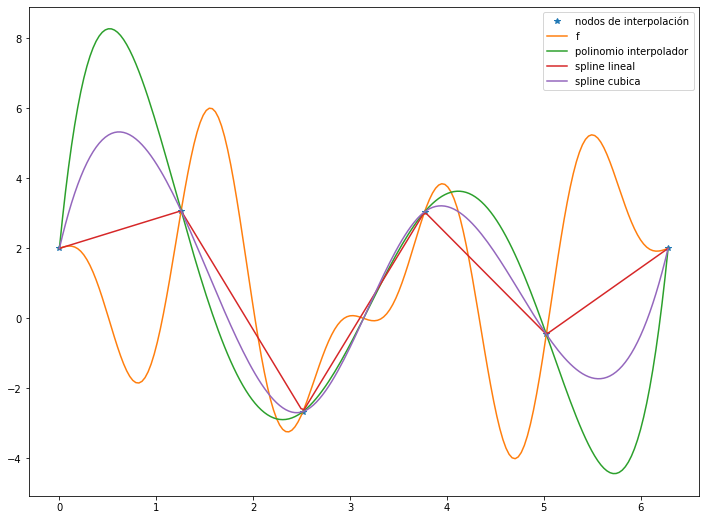

In [19]:
def f(x):
    return 1 + np.cos(x) - 3*np.sin(3*x) + 2*np.sin(5*x)

xs = np.linspace(0, 2*np.pi, 6)
ys = f(xs)

coefs = np.polyfit (xs, ys, 5)

from scipy . interpolate import UnivariateSpline
s = UnivariateSpline (xs, ys, k=1, s=0)

from scipy . interpolate import CubicSpline
cs3 = CubicSpline (xs, ys)

x_eval = np.linspace(0, 2*np.pi, 200)
y_f = f(x_eval)
y_poly = np.polyval(coefs, x_eval)
y_linear_spline = s(x_eval)
y_cubic_spline = cs3(x_eval)


plt.figure(figsize=(12,9))
plt.plot(xs, ys, '*', label='nodos de interpolación')
plt.plot(x_eval, y_f, label='f')
plt.plot(x_eval, y_poly, label='polinomio interpolador')
plt.plot(x_eval, y_linear_spline, label='spline lineal')
plt.plot(x_eval, y_cubic_spline, label='spline cubica')
plt.legend()

- (1p.) Repite el apartado anterior con $N=10$ y $N=15$. A continuación responde a estas preguntas en una celda *Markdown*. ¿Qué aproximación es mejor y cuál es peor a medida que $N$ aumenta? ¿Por qué?

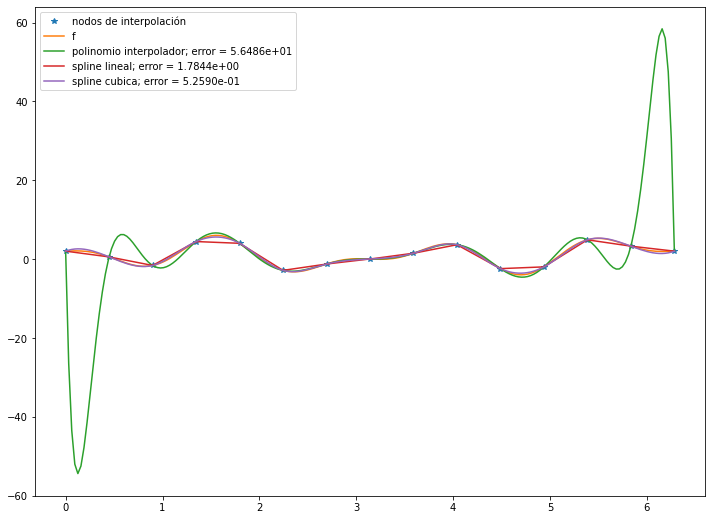

In [20]:
for N in (10, 15):

    xs = np.linspace(0,2*np.pi,N)
    ys = f(xs)

    coefs = np.polyfit ( xs ,ys , N-1 )

    from scipy . interpolate import UnivariateSpline
    s = UnivariateSpline ( xs , ys , k =1 , s =0)

    from scipy . interpolate import CubicSpline
    cs3 = CubicSpline ( xs , ys )

    x_eval = np.linspace(0,2*np.pi,200)
    y_f = f(x_eval)
    y_poly = np.polyval(coefs, x_eval)
    y_linear_spline = s(x_eval)
    y_cubic_spline = cs3(x_eval)
    
    error_poly = np.max(np.abs(y_poly - y_f))
    error_linear_spline = np.max(np.abs(y_linear_spline - y_f))
    error_cubic_spline = np.max(np.abs(y_cubic_spline - y_f))

    plt.figure(figsize=(12,9))
    plt.plot(xs, ys, '*', label='nodos de interpolación')
    plt.plot(x_eval, y_f, label='f')
    plt.plot(x_eval, y_poly, label='polinomio interpolador; error = %.4e'%error_poly)
    plt.plot(x_eval, y_linear_spline, label='spline lineal; error = %.4e'%error_linear_spline)
    plt.plot(x_eval, y_cubic_spline, label='spline cubica; error = %.4e'%error_cubic_spline)
    plt.legend()

> - Al aumentar el número de puntos el error cometido por el polinomio interpolador aumenta: se intuye el fenómeno de Runge. El problema se arreglaría usando nodos de Chebichev en vez de nodos equiespaciados.
> - Al aumentar el número de puntos el error cometido por las splines, sean cúbicas o lineales, disminuye.  El error de la spline cúbica disminuye más rápido que el de la spline lineal. De hecho, si las derivadas están acotadas (como es el caso), la teoría demuestra que el error converge a cero.

-  (0,5p.) ¿Cuantos puntos equiespaciados serían necesarios para que la interpolación lineal a trozos aproximara la función $f$ en el intervalo $[0,2\pi]$ con un error menor que $10^{-3}$?

> Sabemos que el error que se comete aproximando $f$ por la interpolación lineal a trozos con $N+1$ puntos equiespaciadosestá acotado por

>$$ \frac{h^2}{8}\max_{[0,2\pi]}|f''(x)|,\qquad h:=\frac{2\pi}{N}.$$

> La derivada segunda de $f$ es:

>$$ f''(x) = -\cos(x) + 27\sin(3x) - 50\sin(5x), $$

> y por tanto

>$$ \max_{[0,2\pi]}|f''(x)|\leq 1 + 27 + 50 = 78. $$

> Si queremos que el error sea menor que $10^{-3}$ tenemos que elegir $N$ de forma que:

>$$ \left(\frac{2\pi}{N}\right)^2\frac{78}{8}< 10^{-3}\implies 39000\pi^2<N^2. $$

>$N$ tiene que ser mayor que:

In [21]:
np.sqrt(39000)*np.pi

620.4148383480887

- (Extra: 0,5p.) ¿Habría alguna forma de elegir los nodos de interpolación de forma que el polinomio interpolador con $N=15$ aproxime mejor a la función en el intervalo $[-1,1]$? Si la respuesta es afirmativa indica cuales son esos nodos y representa gráficamente el polinomio interpolador resultante.

> Usamos los nodos de Chebyshev en vez de nodos equiespaciados

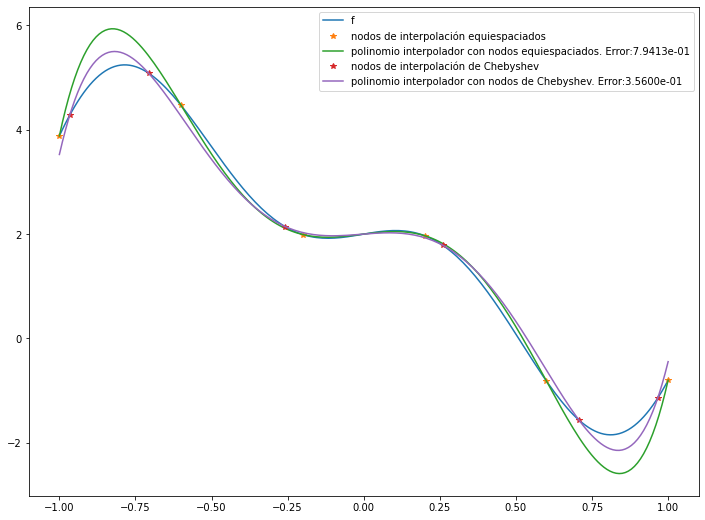

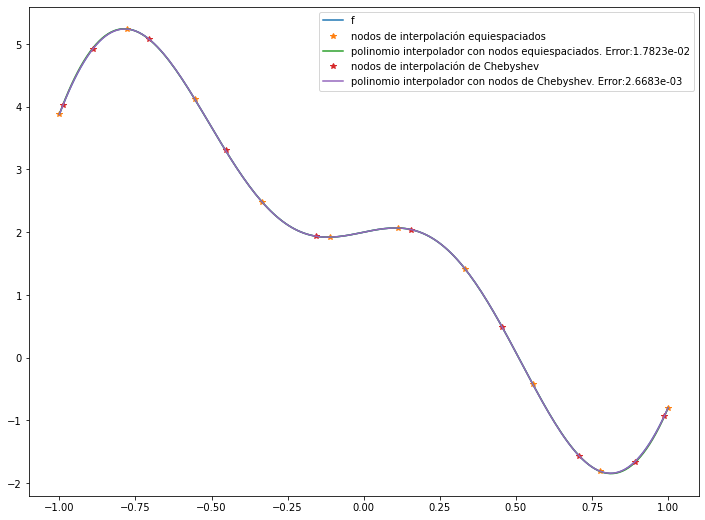

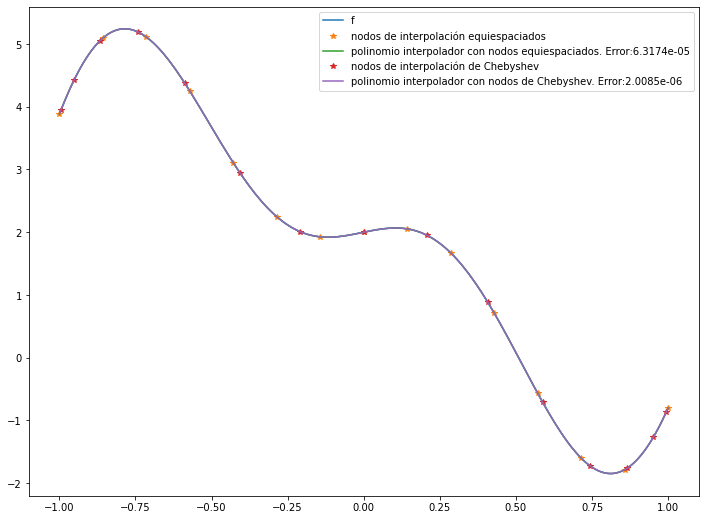

In [22]:
def f(x):
    return 1 + np.cos(x) - 3*np.sin(3*x) + 2*np.sin(5*x)

for N in (6, 10, 15):

    xs = np.linspace(-1,1,N)
    ys = f(xs)

    xs_cheb = np.array([np.cos(((2*k-1)*np.pi)/(2*N)) for k in range(1,N+1)])
    ys_cheb = f(xs_cheb)

    coefs = np.polyfit ( xs ,ys , N-1 )
    coefs_cheb = np.polyfit ( xs_cheb ,ys_cheb , N-1 )

    x_eval = np.linspace(-1,1,200)
    y_f = f(x_eval)
    y_poly = np.polyval(coefs, x_eval)
    y_poly_cheb = np.polyval(coefs_cheb, x_eval)
    error = np.max(np.abs(y_f-y_poly))
    error_cheb = np.max(np.abs(y_f-y_poly_cheb))


    plt.figure(figsize=(12,9))
    plt.plot(x_eval, y_f, label='f')
    plt.plot(xs, ys, '*', label='nodos de interpolación equiespaciados')
    plt.plot(x_eval, y_poly, label='polinomio interpolador con nodos equiespaciados. Error:%.4e'%error)
    plt.plot(xs_cheb, ys_cheb, '*', label='nodos de interpolación de Chebyshev')
    plt.plot(x_eval, y_poly_cheb, label='polinomio interpolador con nodos de Chebyshev. Error:%.4e'%error_cheb)
    plt.legend()

> - Vemos que el error disminuye en ambos casos, un poco más rápido en el caso de nodos de Chebyshev.
> - (curiosidad) Si repetimos para el intervalo [0,2pi], vemos que para nodos equiespaciados el error aumenta con el número de nodos (¿fenómeno de Runge?), mientras que para nodos de Chebyshev disminuye bastante rápido. Si seguimos aumentando el número de nodos, eventualmente el error también disminuye para nodos equiespaciados, pero más despacio que para nodos de Chebyshev. Los nodos de Chebyshev para el intervalo `[0,2*pi]` son los nodos del intervalo `[-1,1]`, pero transformados por una traslación y una homotecia que lleva el intervalo `[0,1]` sobre el otro `t -> t*pi + pi`.

/home/pang/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/pang/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/pang/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/pang/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/pang/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/pang/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3

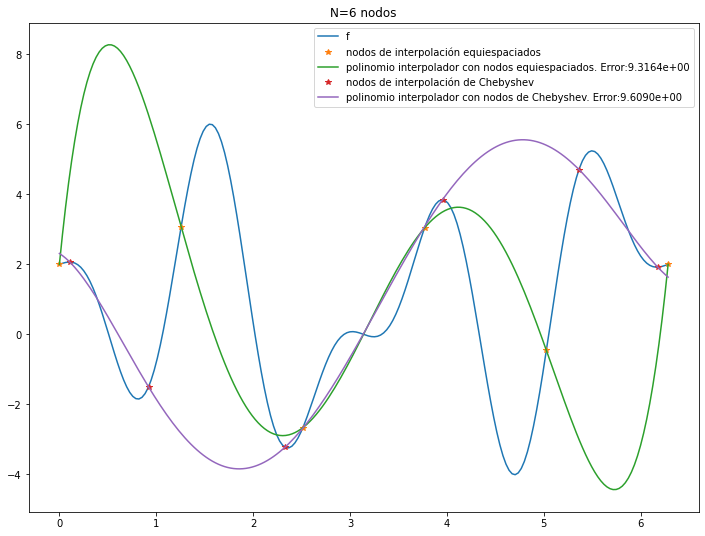

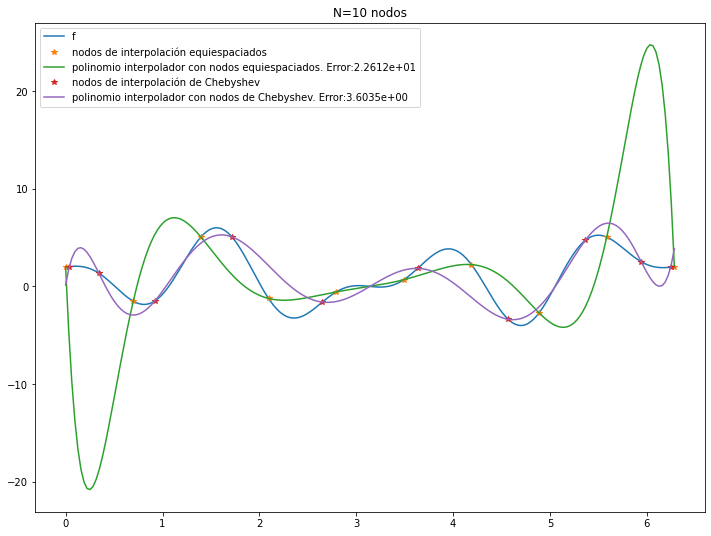

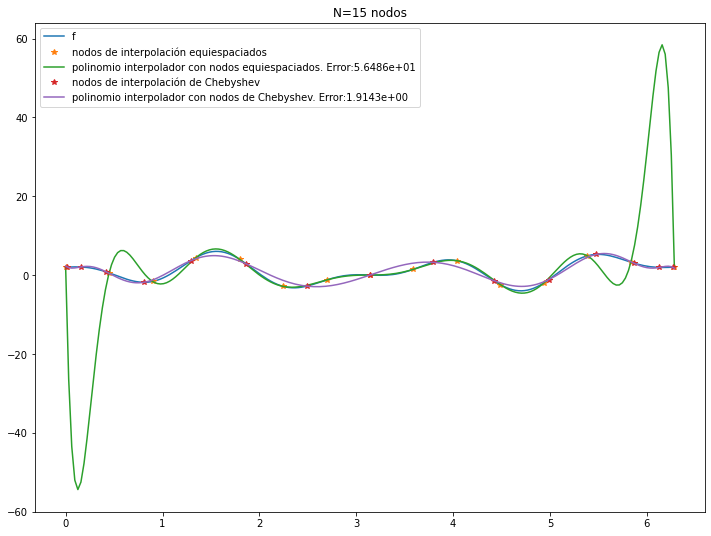

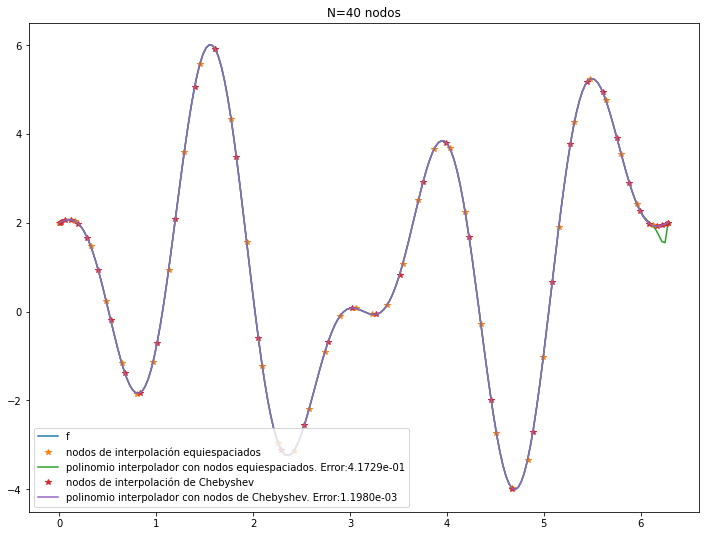

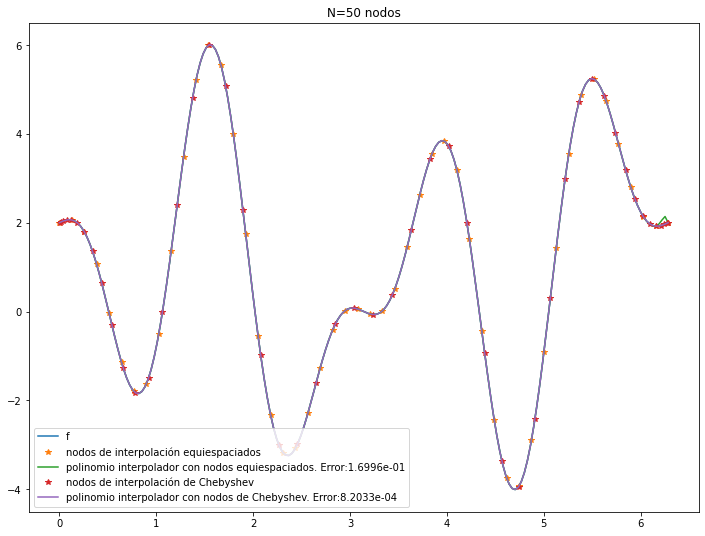

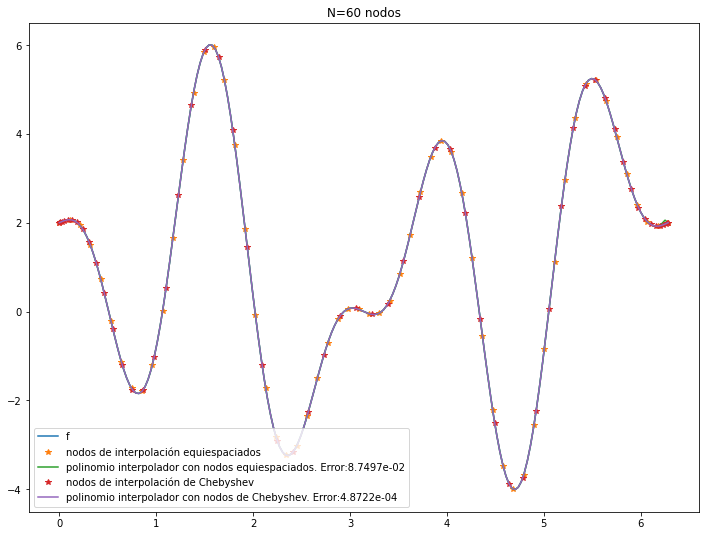

In [23]:
def f(x):
    return 1 + np.cos(x) - 3*np.sin(3*x) + 2*np.sin(5*x)

for N in (6, 10, 15, 40, 50, 60):

    xs = np.linspace(0,2*np.pi,N)
    ys = f(xs)

    xs_cheb = (np.array([np.cos(((2*k-1)*np.pi)/(2*N)) for k in range(1,N+1)])+1)*np.pi
    ys_cheb = f(xs_cheb)

    coefs = np.polyfit ( xs ,ys , N-1 )
    coefs_cheb = np.polyfit ( xs_cheb ,ys_cheb , N-1 )

    x_eval = np.linspace(0,2*np.pi,200)
    y_f = f(x_eval)
    y_poly = np.polyval(coefs, x_eval)
    y_poly_cheb = np.polyval(coefs_cheb, x_eval)

    error = np.max(np.abs(y_f-y_poly))
    error_cheb = np.max(np.abs(y_f-y_poly_cheb))


    plt.figure(figsize=(12,9))
    plt.title('N=%d nodos'%N)
    plt.plot(x_eval, y_f, label='f')
    plt.plot(xs, ys, '*', label='nodos de interpolación equiespaciados')
    plt.plot(x_eval, y_poly, label='polinomio interpolador con nodos equiespaciados. Error:%.4e'%error)
    plt.plot(xs_cheb, ys_cheb, '*', label='nodos de interpolación de Chebyshev')
    plt.plot(x_eval, y_poly_cheb, label='polinomio interpolador con nodos de Chebyshev. Error:%.4e'%error_cheb)
    plt.legend()